In [ ]:
### ALL DATA IS FROM YAHOO FINANCE
### This Analysis is based on the book DATA-DRIVEN FINANCE by yves hilpisch
### created by Jorge Cerquera on 04/10/2020

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb

## Setting the styles and fonts
## not necessary but it looks better
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [2]:
data = pd.read_excel('practiceData.xlsx', index_col=0, parse_dates = True)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2015-04-20 to 2020-04-17
Data columns (total 4 columns):
Rut Close     1259 non-null float64
vix Close     1259 non-null float64
gold close    1259 non-null float64
Dow Close     1259 non-null float64
dtypes: float64(4)
memory usage: 49.2 KB


In [4]:
data.head()

,Rut Close,vix Close,gold close,Dow Close
Date,,,,
2015-04-20,1264.920044,13.30,1193.500000,18034.929688
2015-04-21,1264.150024,13.25,1202.900024,17949.589844
2015-04-22,1265.479980,12.71,1186.900024,18038.269531
2015-04-23,1271.540039,12.48,1194.400024,18058.689453
2015-04-24,1267.540039,12.29,1175.199951,18080.140625


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11da895d0>,
      dtype=object)

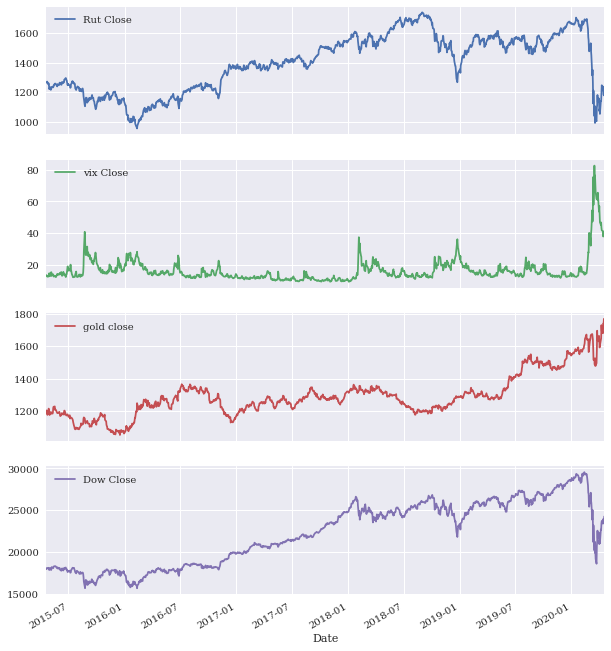

In [5]:
data.plot(figsize=(10,12), subplots=True)

In [6]:
instruments = ['Russel 2000 index', 'Volatility index','Gold','Dow Jones Industrial']
for x, name in zip(data.columns, instruments):
    print('{:8s} | {}'.format(x,name))

Rut Close | Russel 2000 index
vix Close | Volatility index
gold close | Gold
Dow Close | Dow Jones Industrial


In [7]:
data.describe().round(2)

,Rut Close,vix Close,gold close,Dow Close
count,1259.00,1259.00,1259.00,1259.00
mean,1400.37,16.14,1290.48,22211.65
std,192.71,7.85,129.12,3798.48
min,953.72,9.14,1050.80,15660.18
25%,1229.11,12.28,1212.20,18143.76
50%,1420.15,14.02,1273.00,22349.59
75%,1555.60,17.32,1327.45,25541.42
max,1740.75,82.69,1769.40,29551.42


In [8]:
data.aggregate([min, np.mean, np.std, np.median, max]) ## Selecting only the data we want

,Rut Close,vix Close,gold close,Dow Close
min,953.719971,9.140000,1050.800049,15660.179688
mean,1400.372932,16.137625,1290.475457,22211.646505
std,192.706152,7.849894,129.120324,3798.480297
median,1420.150024,14.020000,1273.000000,22349.589844
max,1740.750000,82.690002,1769.400024,29551.419922


In [9]:
data.diff().head() ## absolute changes between two index values

,Rut Close,vix Close,gold close,Dow Close
Date,,,,
2015-04-20,NaN,NaN,NaN,NaN
2015-04-21,-0.770020,-0.05,9.400024,-85.339844
2015-04-22,1.329956,-0.54,-16.000000,88.679687
2015-04-23,6.060059,-0.23,7.500000,20.419922
2015-04-24,-4.000000,-0.19,-19.200073,21.451172


In [10]:
data.diff().mean() ## mean changes between two index values

Rut Close    -0.028474
vix Close     0.019754
gold close    0.443402
Dow Close     4.934468
dtype: float64

In [11]:
data.pct_change().round(3).head() ## percent changes

,Rut Close,vix Close,gold close,Dow Close
Date,,,,
2015-04-20,NaN,NaN,NaN,NaN
2015-04-21,-0.001,-0.004,0.008,-0.005
2015-04-22,0.001,-0.041,-0.013,0.005
2015-04-23,0.005,-0.018,0.006,0.001
2015-04-24,-0.003,-0.015,-0.016,0.001


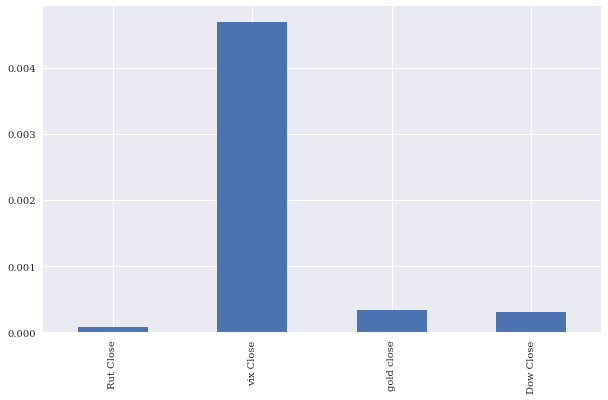

In [12]:
data.pct_change().mean().plot(kind='bar', figsize=(10,6))

In [13]:
rets = np.log(data / data.shift(1)) ## gets the Log returns 
rets.head().round(3)

,Rut Close,vix Close,gold close,Dow Close
Date,,,,
2015-04-20,NaN,NaN,NaN,NaN
2015-04-21,-0.001,-0.004,0.008,-0.005
2015-04-22,0.001,-0.042,-0.013,0.005
2015-04-23,0.005,-0.018,0.006,0.001
2015-04-24,-0.003,-0.015,-0.016,0.001


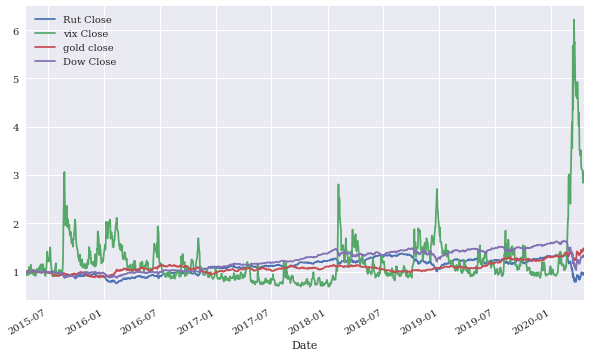

In [14]:
rets.cumsum().apply(np.exp).plot(figsize=(10,6))
## can see the recent sotck market crash with the vix hitting highs

In [15]:
data.resample('1w', label='right').last().head() 
## data gets resampled to weekly


,Rut Close,vix Close,gold close,Dow Close
Date,,,,
2015-04-26,1267.540039,12.29,1175.199951,18080.140625
2015-05-03,1228.109985,12.70,1174.500000,18024.060547
2015-05-10,1234.930054,12.86,1189.099976,18191.109375
2015-05-17,1243.949951,12.38,1225.500000,18272.560547
2015-05-24,1252.219971,12.13,1204.300049,18232.019531


In [16]:
data.resample('1m', label='right').last().head() ## 1 month

,Rut Close,vix Close,gold close,Dow Close
Date,,,,
2015-04-30,1220.130005,14.55,1182.400024,17840.519531
2015-05-31,1246.530029,13.84,1189.400024,18010.679688
2015-06-30,1253.949951,18.23,1171.500000,17619.509766
2015-07-31,1238.680054,12.12,1094.900024,17689.859375
2015-08-31,1159.449951,28.43,1131.599976,16528.029297


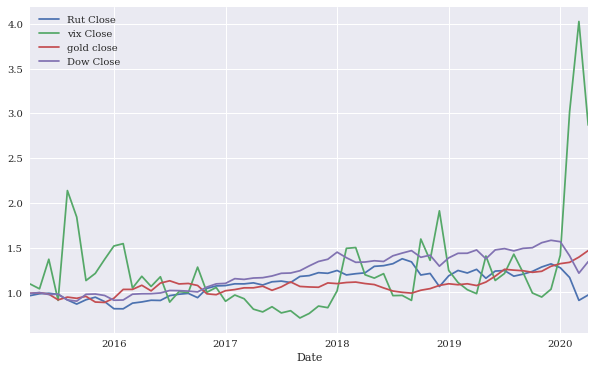

In [17]:
rets.cumsum().apply(np.exp).resample('1m', label='right').last().plot(figsize=(10,6))
## plots cummulative log returns by months

In [18]:
## rolling statistics
sym= 'Dow Close'
data2 = pd.DataFrame(data[sym]).dropna()
data2.tail()
## creates a new dataset to analyze the rolling stats of the Dow 

window = 20 ## number of index values to include in the avg
data2['min'] = data[sym].rolling(window=window).min()
data2['mean'] = data[sym].rolling(window=window).mean()
data2['std'] = data[sym].rolling(window=window).std()
data2['median'] = data[sym].rolling(window=window).median()
data2['max'] = data[sym].rolling(window=window).max()
data2['ewma'] = data[sym].ewm(halflife=.5,min_periods=window).mean() 
## exponentially weighted moving average

In [19]:
data2.dropna().head()

,Dow Close,min,mean,std,median,max,ewma
Date,,,,,,,
2015-05-15,18272.560547,17840.519531,18046.214063,114.222059,18048.479492,18272.560547,18255.776830
2015-05-18,18298.880859,17840.519531,18059.411621,127.344654,18059.589843,18298.880859,18288.104852
2015-05-19,18312.390625,17840.519531,18077.551660,136.395881,18064.360351,18312.390625,18306.319182
2015-05-20,18285.400391,17840.519531,18089.908203,143.651115,18069.315430,18312.390625,18290.630089
2015-05-21,18285.740234,17840.519531,18101.260742,149.890344,18075.270508,18312.390625,18286.962698


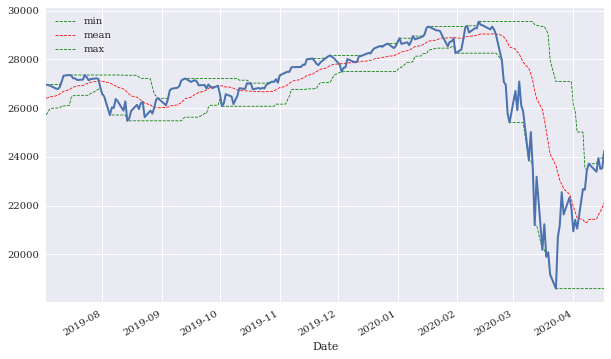

In [20]:
ax = data2[['min', 'mean', 'max']].iloc[-200:].plot(
        figsize=(10,6), style=['g--','r--','g--'], lw=.8)
data2[sym].iloc[-200:].plot(ax=ax, lw=2.0)

## Closer look at the dow crash 

In [24]:
## 1 = shorter-term MA
## 2 = Longer-term MA

data2['SMA1'] = data2[sym].rolling(window=42).mean()
data2['SMA2'] = data2[sym].rolling(window=252).mean()
data2[[sym, 'SMA1', 'SMA2']].tail().round(3)

,Dow Close,SMA1,SMA2
Date,,,
2020-04-13,23390.77,24182.178,26599.441
2020-04-14,23949.76,24048.805,26589.669
2020-04-15,23504.35,23907.877,26578.239
2020-04-16,23537.68,23768.344,26566.672
2020-04-17,24242.49,23649.542,26557.914


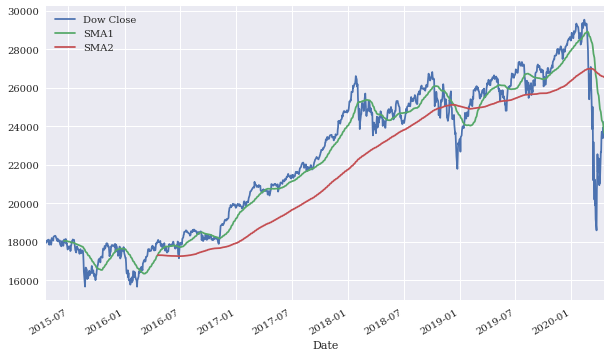

In [25]:
data2[[sym, 'SMA1', 'SMA2']].plot(figsize=(10, 6))

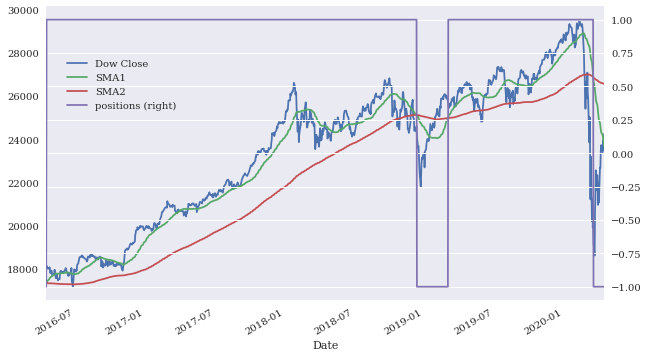

In [26]:

data2.dropna(inplace=True)

## if the 1st avg is greater than the second put a 1 and vice versa
data2['positions'] = np.where(data2['SMA1'] > data2['SMA2'], 1, -1)

## if 
ax = data2[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10,6),
                                                   secondary_y='positions')

ax.get_legend().set_bbox_to_anchor((.25, .85))

# Correlation analysis

In [33]:
## making a data set of the vix and dow from the main dataset

data3 = pd.DataFrame(data[['Dow Close','vix Close']]).dropna()
data3.tail().round(2)

,Dow Close,vix Close
Date,,
2020-04-13,23390.77,41.17
2020-04-14,23949.76,37.76
2020-04-15,23504.35,40.84
2020-04-16,23537.68,40.11
2020-04-17,24242.49,38.15


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11f4730d0>,
      dtype=object)

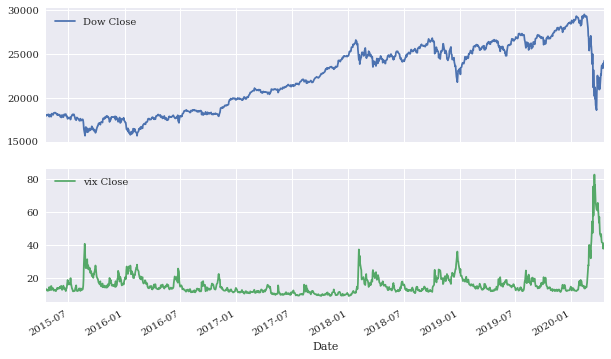

In [34]:
data3.plot(subplots=True, figsize=(10,6))

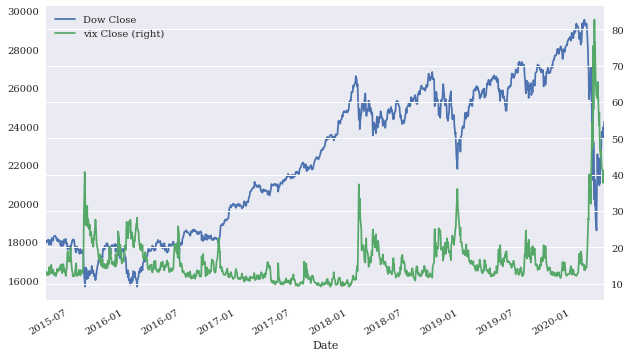

In [37]:
data3.plot(secondary_y='vix Close', figsize=(10,6))

In [ ]:
## Logarithmic Returns


In [38]:
rets = np.log( data3 / data3.shift(1))
rets.head()

,Dow Close,vix Close
Date,,
2015-04-20,NaN,NaN
2015-04-21,-0.004743,-0.003766
2015-04-22,0.004928,-0.041608
2015-04-23,0.001131,-0.018262
2015-04-24,0.001187,-0.015341


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11f818590>,
      dtype=object)

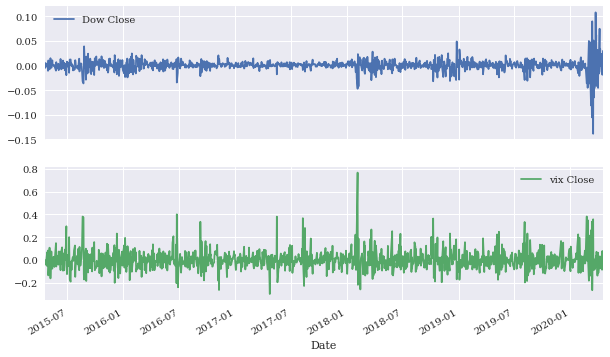

In [39]:
rets.plot(subplots=True, figsize=(10,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e356410>,
      dtype=object)

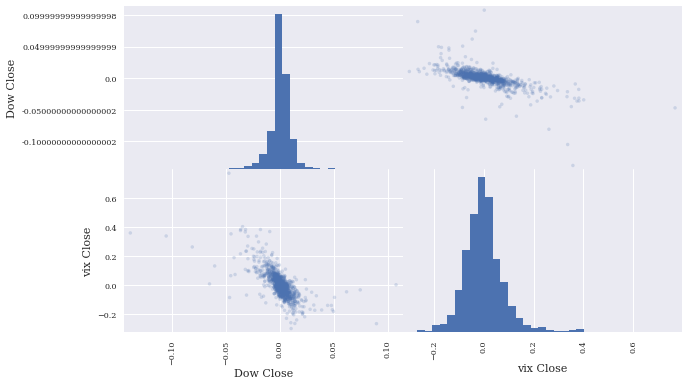

In [40]:

pd.plotting.scatter_matrix(rets, alpha=.2,
                          diagonal='hist',
                          hist_kwds={'bins': 35},
                          figsize=(10,6))

In [ ]:
## OLS Regression

In [43]:
rets.dropna(inplace=True) ## drops na values

## implements the linear OLS regression
reg = np.polyfit(rets['Dow Close'], rets['vix Close'], deg=1)

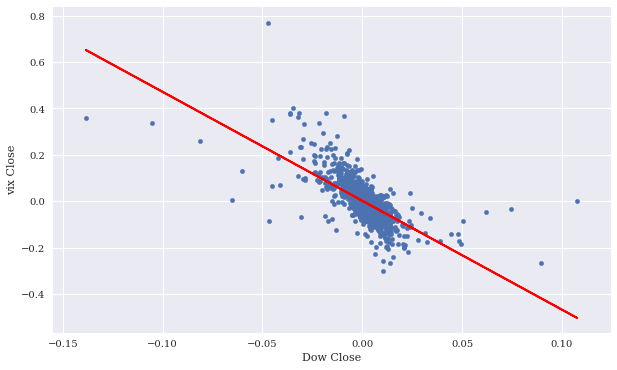

In [44]:
## plots the log returns as a scatterplot
ax = rets.plot(kind='scatter', x='Dow Close', y='vix Close', figsize=(10,6))
## adds the linear regression line
ax.plot(rets['Dow Close'], np.polyval(reg, rets['Dow Close']), 
                                               'r', lw=2)

In [45]:
### Correlation

rets.corr()

,Dow Close,vix Close
Dow Close,1.000000,-0.674001
vix Close,-0.674001,1.000000


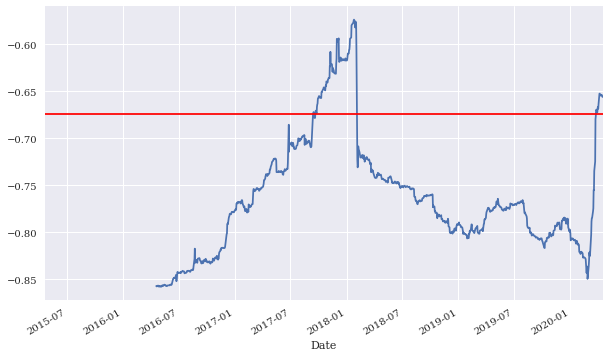

In [46]:
ax = rets['Dow Close'].rolling(window=252).corr(
                            rets['vix Close']).plot(figsize=(10,6))
ax.axhline(rets.corr().iloc[0,1], c='r')

In [ ]:
### ALL DATA IS FROM YAHOO FINANCE